In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

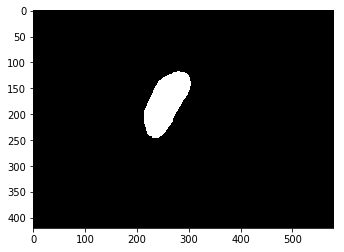

In [2]:
img_filename = r"C:\Users\ChiaWei\Desktop\ultrasound-never-segmentation-new\raw\train\9_114_mask.tif"
img = cv2.imread(img_filename,0)
plt.imshow(img, cmap='gray')
plt.show()

In [3]:
def is_edge(img, x, y):
    x5 = img[x, y]
    neighbours = []
    for marginx in [-1, 0, 1]:
        for marginy in [-1, 0, 1]:
            new_x = x + marginx
            new_y = y + marginy
            if(new_x < 0 or new_x >= img.shape[0]): continue
            if(new_y < 0 or new_y >= img.shape[1]): continue
            neighbours.append(img[new_x, new_y])
    all_whites = all(map(lambda i: i==255, neighbours))
    all_blacks = all(map(lambda i: i==0, neighbours))
    return (not all_whites) and (not all_blacks)
    

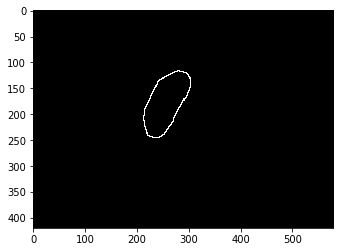

In [4]:
img_test = img.copy()
for x in range(img.shape[0]):
    for y in range(img.shape[1]):
        img_test[x, y] = int(is_edge(img, x, y))
        
plt.imshow(img_test, cmap='gray')
plt.show()